### Task 1 : Import necessary Libraries and load dataset.

### Step - 1 : Import Required python libraires.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Step - 2 : Load the IRIS Dataset.

In [2]:
data = load_iris()
X = data.data
Y = data.target
classes = data.target_names

### Step- 3 : Print the head of the dataset.

In [3]:
df = pd.DataFrame(X, columns=data.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


### Step-4 : Plot the label distribution.

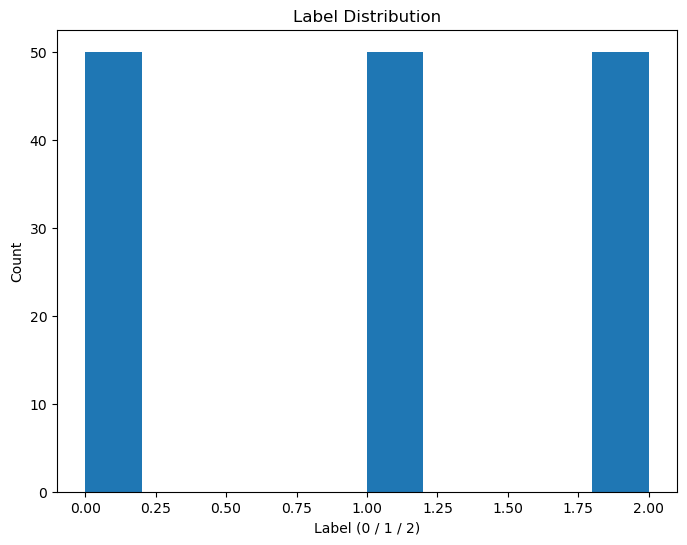

In [4]:
plt.figure(figsize=(8,6))
plt.hist(Y, rwidth=1)
plt.title('Label Distribution')
plt.xlabel('Label (0 / 1 / 2)')
plt.ylabel('Count')
plt.show()

### Step - 5 : Print the target label names.

In [5]:
for i, name in enumerate(classes):
  print(f"Target {i} is {name}")

Target 0 is setosa
Target 1 is versicolor
Target 2 is virginica


### Task 2 : Data Splitting and Model Training.

## Step 1 : Split the dataset into traing and testing sets.

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True,
random_state=42)

### Step 2 : Create and train the KNN Mmdel.

In [7]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

### Task 3 : Evaluation and Visualization

## Step - 1 : Make predictions on the test set

In [8]:
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

## Step - 2 : Compute and plot the confusion matrix for the training set

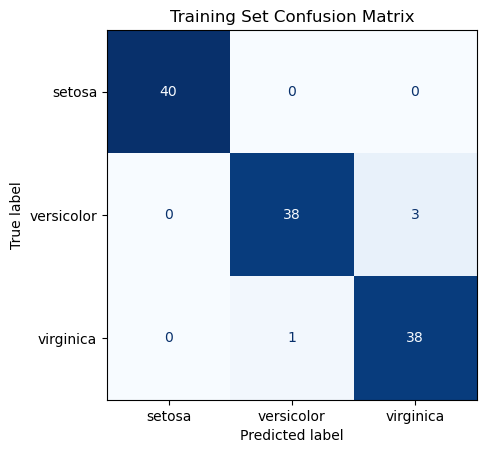

In [9]:
confusion_train = confusion_matrix(y_train, y_pred_train)
conf_display_train = ConfusionMatrixDisplay(confusion_train, display_labels=classes)
conf_display_train.plot(cmap=plt.cm.Blues, colorbar=False)
plt.title('Training Set Confusion Matrix')
plt.show()

## Step - 3: Compute and plot the confusion matrix for the test set

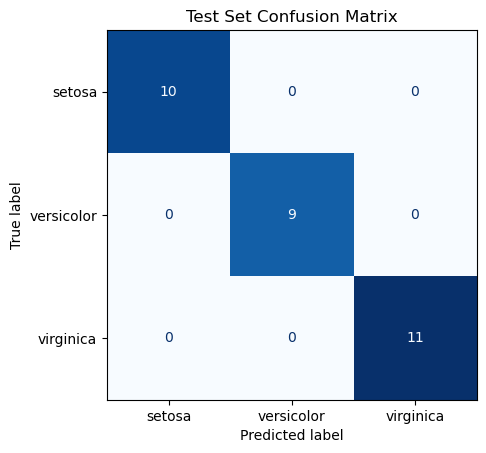

In [10]:
confusion_test = confusion_matrix(y_test, y_pred)
conf_display_test = ConfusionMatrixDisplay(confusion_test, display_labels=classes)
conf_display_test.plot(cmap=plt.cm.Blues, colorbar=False)
plt.title('Test Set Confusion Matrix')
plt.show()

# Task 4 : Print the classification report.

## Step - 1 : Compute and print the classificaton report.

In [11]:
classification_rep = classification_report(y_test, y_pred, target_names=classes, output_dict=True)
df_classification_rep = pd.DataFrame(classification_rep).transpose()

## Step - 2: Print hte classification report in a tabular format with a border of 1.

In [12]:
from tabulate import tabulate
print(tabulate(df_classification_rep, headers='keys', tablefmt='fancy_grid'))

╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│              │   precision │   recall │   f1-score │   support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ setosa       │           1 │        1 │          1 │        10 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ versicolor   │           1 │        1 │          1 │         9 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ virginica    │           1 │        1 │          1 │        11 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │           1 │        1 │          1 │         1 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ macro avg    │           1 │        1 │          1 │        30 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ weighted avg │           1 │        1 │          1 │        30 │
╘══════════════╧═════════════╧══════════╧════════════╧════════